In [2]:
import seaborn
import numpy as np
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-1864 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442329878.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 319332 observations with 30287 users and 109 items.
PROGRESS:     Data prepared in: 0.138466s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [51]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219487 observations with 29260 users and 64 items.
PROGRESS:     Data prepared in: 0.11048s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations             

NameError: global name 'subset_querys_dict' is not defined

In [52]:
vm.testing_rmse(models, training_df)

{'downhill': 0.48921960827581934,
 'total': 0.37832363554943554,
 'uphill': 0.23419310292712242}

In [36]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

total_rating  uphill_rating  downhill_rating
seg_average_grade      0.786300      -0.106670         0.382798
seg_distance           0.189524      -0.106644         0.321042
seg_maximum_grade      0.186814       0.010224         0.128570
total_rating           1.000000      -0.635359         0.790941
uphill_rating         -0.635359       1.000000              NaN
downhill_rating        0.790941            NaN         1.000000

In [45]:
sum(np.corrcoef(athlete_ratings.uphill_rating.values, training_df.groupby('athlete_id').mean().average_speed.values))

array([ nan,  nan])

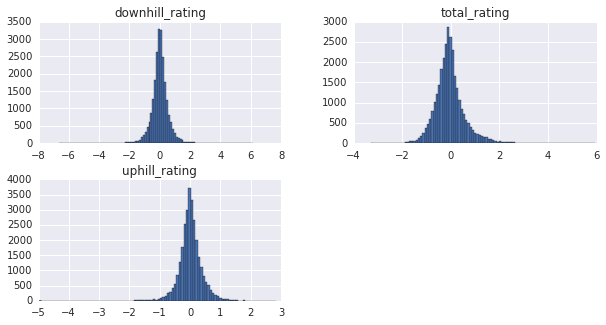

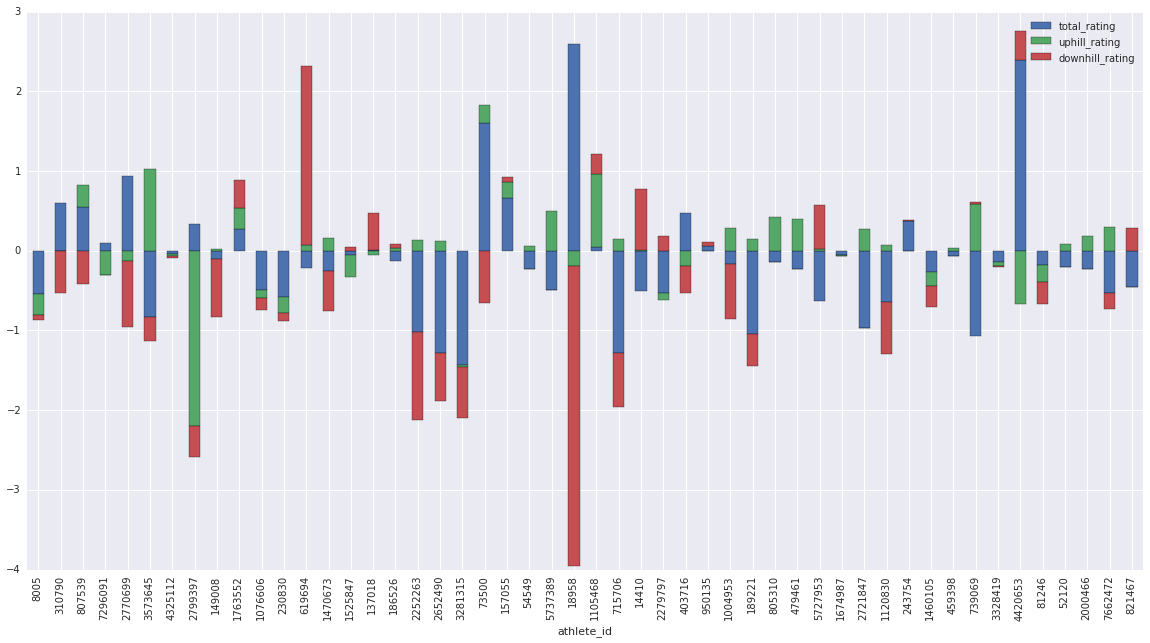

In [38]:
vm.plot_ratings(athlete_ratings)

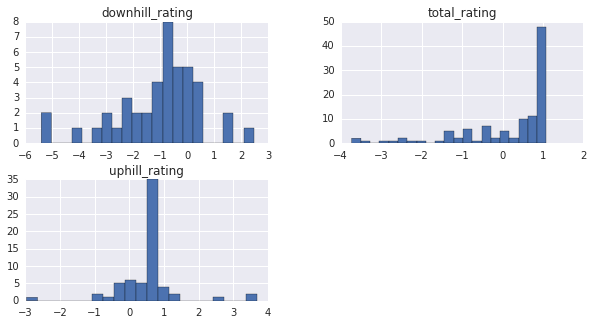

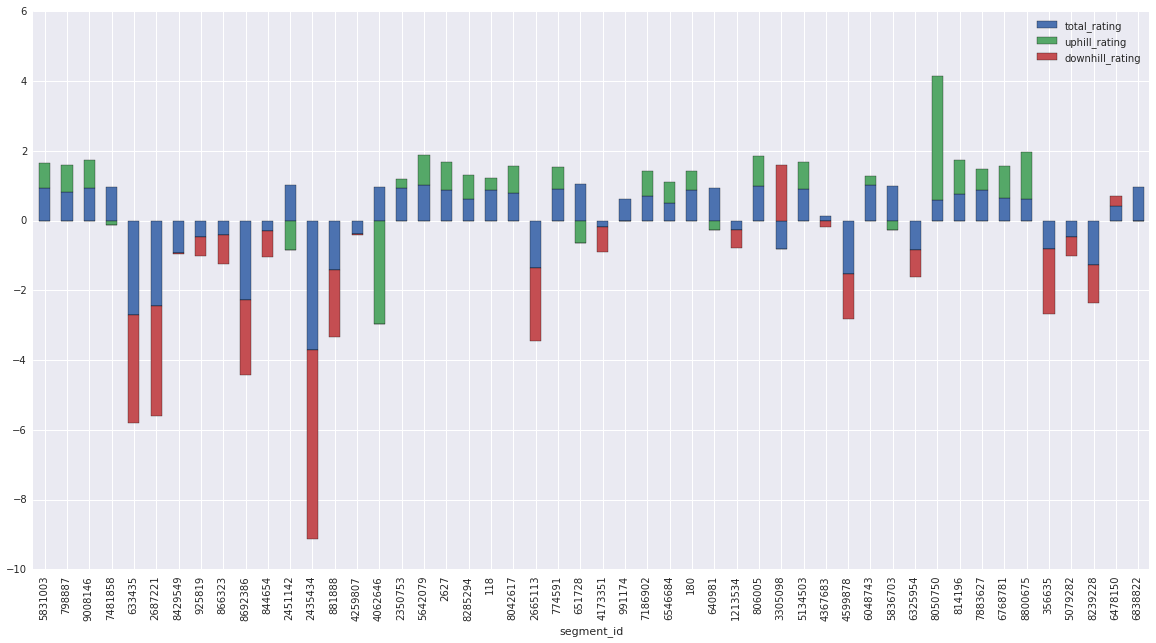

In [39]:
vm.plot_ratings(segment_ratings)

In [40]:
leaderboards = r.get_all_leaderboards(athlete_ratings, file_path='../app/app_data/leaderboards.pkl')
leaderboards

[      athlete_id  total_rating
 rank                          
 1        8531353    100.000000
 2           5165     99.325401
 3        1794874     98.614160
 4         259304     98.594544
 5        3282892     97.406337
 6        5001009     90.834911
 7         180412     90.574609
 8        7727315     90.393945
 9         129795     90.199334
 10       4619284     89.904901
 11        231057     88.942497
 12       7733414     88.880363
 13       2740719     88.522228
 14        220863     88.132129
 15       5559556     88.065625
 16       5503166     88.011689
 17        979905     87.756355
 18        175979     85.573884
 19         62942     84.971010
 20       6038543     84.273592,       athlete_id  uphill_rating
 rank                           
 1         429870            NaN
 2         710609            NaN
 3         288335            NaN
 4        1820361            NaN
 5        1821372            NaN
 6         713429            NaN
 7         289502            NaN

In [41]:
athlete_ratings.head()

total_rating  uphill_rating  downhill_rating
athlete_id                                              
7              -0.037212       0.230700         0.525127
8              -0.501379      -0.167738        -0.416469
12             -0.139642      -0.000281        -0.101519
17             -0.520004      -0.153302        -0.021133
19              0.043995       0.134814        -0.440023

In [42]:
athlete_ratings.total_rating.values.shape

(30287,)

In [53]:
models.keys()

['uphill', 'total', 'downhill']